In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.core.display import display
from IPython.display import Image, display_png
from tqdm import tqdm_notebook as tqdm
import PIL.Image

In [4]:
import pathlib

import numpy as np
import sklearn.externals.joblib as joblib

import pytoolkit as tk
from lib import data, generator, evaluation

In [5]:
X, d, y = data.load_train_data()
Xy = np.concatenate([X, y * 255], axis=-1)

In [6]:
Xy_l = np.mean(Xy[:, :, :2, :], axis=2)
Xy_r = np.mean(Xy[:, :, -2:, :], axis=2)
Xy_t = np.mean(Xy[:, :2, :, :], axis=1)
Xy_b = np.mean(Xy[:, -2:, :, :], axis=1)
# 単色な辺は除外
mask_l = np.max(Xy_l[..., 0], axis=1) - np.min(Xy_l[..., 0], axis=1) > 5
mask_r = np.max(Xy_r[..., 0], axis=1) - np.min(Xy_r[..., 0], axis=1) > 5
mask_t = np.max(Xy_t[..., 0], axis=1) - np.min(Xy_t[..., 0], axis=1) > 5
mask_b = np.max(Xy_b[..., 0], axis=1) - np.min(Xy_b[..., 0], axis=1) > 5
print(np.sum(mask_l), np.sum(mask_r), np.sum(mask_t), np.sum(mask_b))

3903 3905 3773 3911


In [7]:
d_lr, ix_lr, d_tb, ix_tb = [], [], [], []
for i in tk.tqdm(np.where(mask_l)[0]):
    d_lr.extend(np.sqrt(np.sum(np.square(Xy_l[i] - Xy_r[mask_r]), axis=(1, 2))))
    ix_lr.extend(zip(np.tile(i, np.sum(mask_r)), np.where(mask_r)[0]))
for i in tk.tqdm(np.where(mask_t)[0]):
    d_tb.extend(np.sqrt(np.sum(np.square(Xy_t[i] - Xy_b[mask_b]), axis=(1, 2))))
    ix_tb.extend(zip(np.tile(i, np.sum(mask_b)), np.where(mask_b)[0]))
d_lr = np.array(d_lr)
d_tb = np.array(d_tb)
ix_lr = np.array(ix_lr)
ix_tb = np.array(ix_tb)

100%|##########################################################| 3773/3773 [00:15<00:00, 248.72it/s]


(14,)

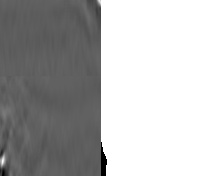

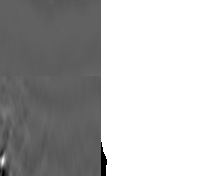

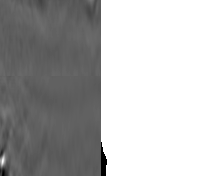

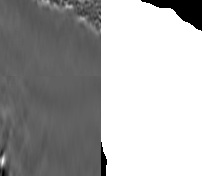

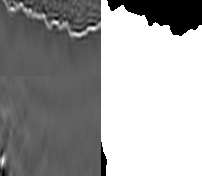

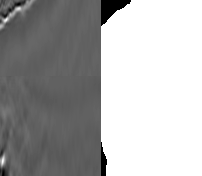

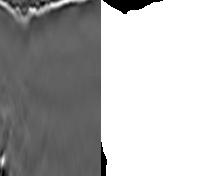

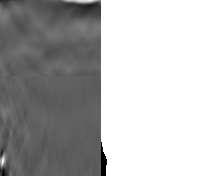

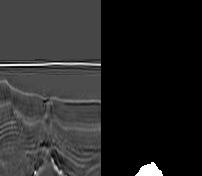

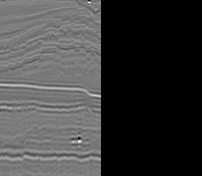

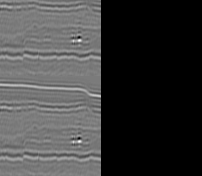

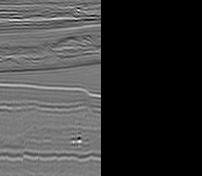

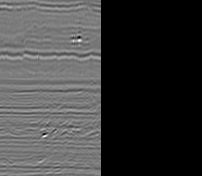

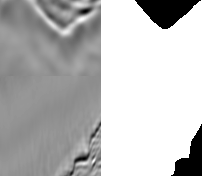

In [8]:
display(np.where(np.array(d_tb) <= 50)[0].shape)
for chk in np.where(d_tb <= 50)[0][:20]:
    Xt = np.concatenate([X[ix_tb[chk][1]], X[ix_tb[chk][0]]], axis=0)
    yt = np.concatenate([y[ix_tb[chk][1]], y[ix_tb[chk][0]]], axis=0)
    img = np.concatenate([Xt[50-25:151+50, :], yt[50-25:151+50, :] * 255], axis=1)
    display(PIL.Image.fromarray(np.squeeze(img).astype(np.uint8)))

(439,)

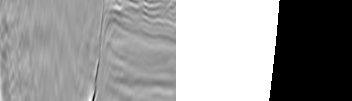

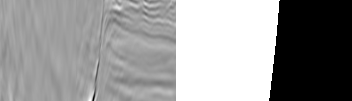

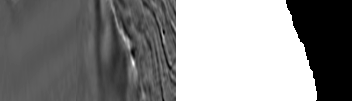

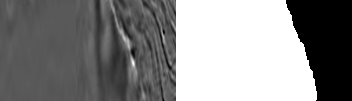

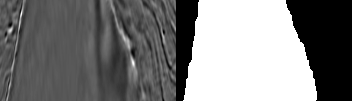

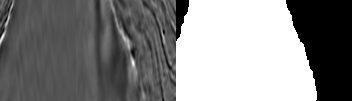

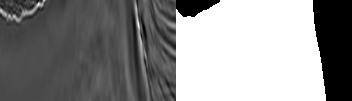

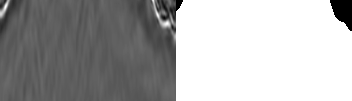

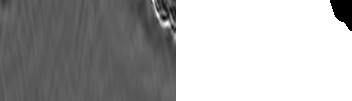

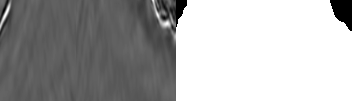

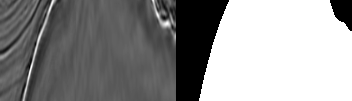

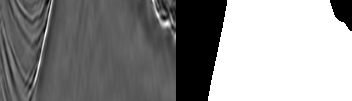

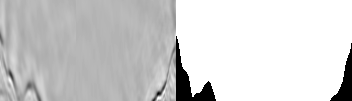

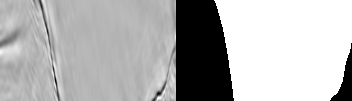

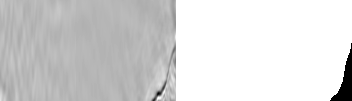

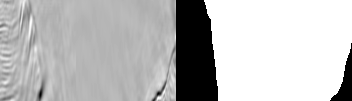

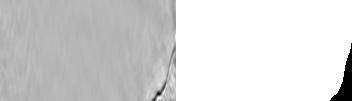

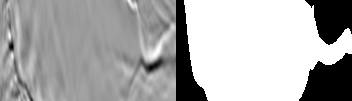

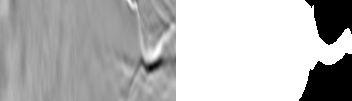

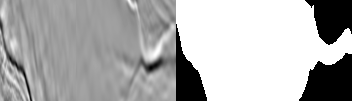

In [9]:
display(np.where(np.array(d_lr) <= 50)[0].shape)
for chk in np.where(d_lr <= 50)[0][:20]:
    Xt = np.concatenate([X[ix_lr[chk][1]], X[ix_lr[chk][0]]], axis=1)
    yt = np.concatenate([y[ix_lr[chk][1]], y[ix_lr[chk][0]]], axis=1)
    img = np.concatenate([Xt[:, 50-25:151+50], yt[:, 50-25:151+50] * 255], axis=1)
    display(PIL.Image.fromarray(np.squeeze(img).astype(np.uint8)))